### Importing Packages

In [2]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import rasterio
import rasterio.mask
from matplotlib import colors, cm
from osgeo import gdal
import os
from rasterio.plot import show
from rasterio.plot import show_hist
from numpy import ma
# import richdem as rd
from pyspatialml import Raster
from tqdm import tqdm
import rioxarray as rxr
import xarray as xr

C:\Users\DELL\anaconda3\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
pwd

'C:\\Users\\DELL\\Downloads\\geoailandslide'

### Importing Files

In [3]:
# Load geospatial datasets

train_data = gpd.read_file("./datasets/Train.gpkg",geometry='geometry')
test_data = gpd.read_file("./datasets/Test.gpkg",geometry='geometry')
val_data = gpd.read_file("./datasets/valtellina.gpkg",geometry='geometry')
road_network = gpd.read_file("./datasets/road_network.gpkg",geometry='geometry')
river_network = gpd.read_file("./datasets/river_network.gpkg",geometry='geometry')
fault_zones = gpd.read_file("./datasets/geological_faults.gpkg",geometry='geometry')
land_use = gpd.read_file("./datasets/land_use_land_cover.gpkg",geometry='geometry')



### Visualizing the map for the train

MemoryError: Unable to allocate 1.39 GiB for an array with shape (1, 14813, 25274) and data type float32

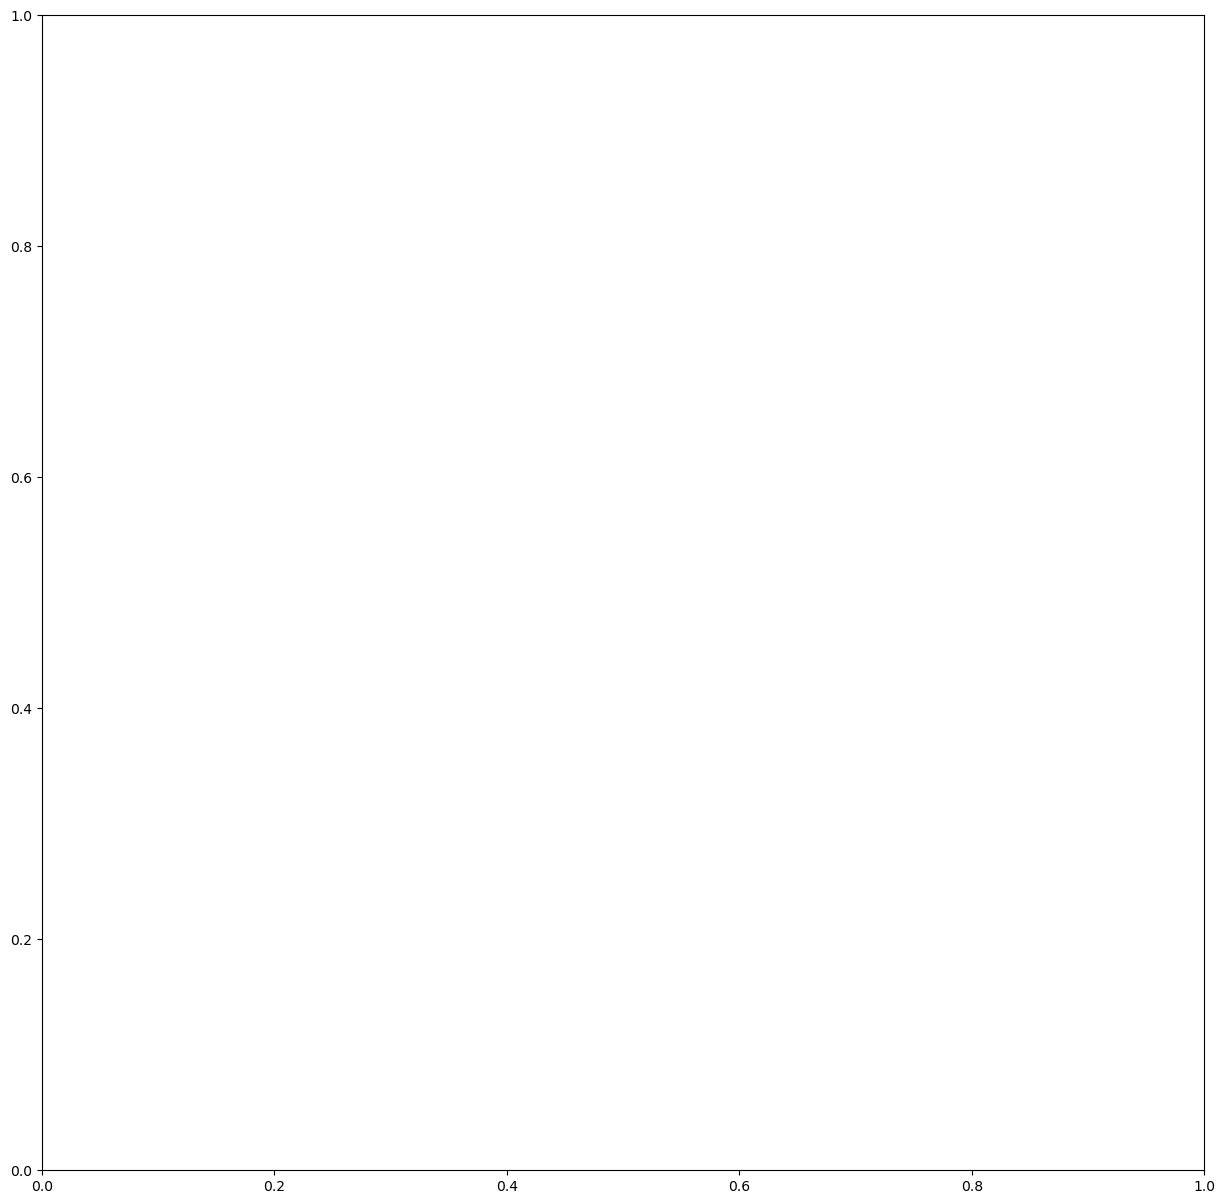

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
DTM = rasterio.open(".\datasets\dtm.tif")
show(DTM,ax = ax, cmap = 'greys')
train_data.plot(column="Target", ax=ax)
plt.savefig(r'train_map.png', bbox_inches='tight')
plt.show()

In [ ]:
dem = gdal.Open(".\datasets\dtm.tif")

### Extracting Features

In [ ]:
TPI = gdal.DEMProcessing("TPI.tif", dem, 'TPI', computeEdges=True)

In [ ]:
TPI = None

In [ ]:
# src = rasterio.open("TPI.tif")
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.set_title("Topographic Position Index", fontsize= 20)
# cmap = plt.get_cmap('terrain')
# data = src.read()

# data_ma = np.ma.masked_where(data == -9999 ,
#                         data,
#                          copy=True)
# show(data_ma, transform=src.transform, ax=ax, cmap=cmap, vmin=-0.05, vmax=0.05)
# fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-0.05, vmax=0.05), cmap=cmap), ax=ax)
# plt.savefig(r'TPI.png', bbox_inches='tight')